<a href="https://colab.research.google.com/github/hieubkset/Colab-Notebooks/blob/master/fashion_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification**

Một ví dụ phân loại ảnh trên tập dữ liệu FASHION MNIST.

## Giới thiệu FASHION MNIST

[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) là bộ dữ liệu gồm 70000 ảnh xám kích thước $28 \times 28$ chia thành 10 class. 

<img src="https://www.tensorflow.org/images/fashion-mnist-sprite.png" width="400px"></img>


## **Import các thư viện cần dùng**


In [0]:
try:
    %tensorflow_version 2.x
except Exception:
    pass

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


## **Load và Explore data**

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [0]:
print('training samples: ', len(x_train))
print('test samples: ', len(x_test))
print('classes: ', (y_train.max() + 1) )
print('image shape: ', x_train[0,...].shape)
print('max value: ', x_train.max())
print('min_value: ', x_train.min())

training samples:  60000
test samples:  10000
classes:  10
image shape:  (28, 28)
max value:  255
min_value:  0


Bảng label và class tương ứng:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Chuẩn hóa data về $[0, 1]$:

In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

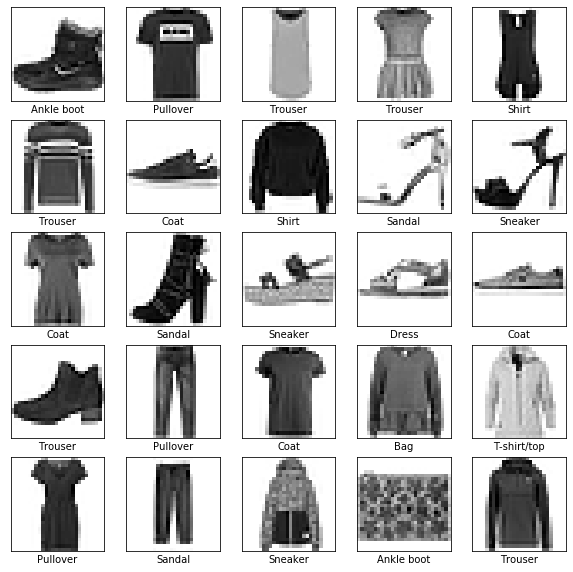

In [0]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='binary')
    plt.xlabel(class_names[y_test[i]])
plt.show()

## **Tạo model**

Một ví dụ về Neural Network (NN):
+ Input layer: 3 unit
+ Hidden layer: 4 unit
+ Output layer: 2 unit (ứng với 2 class)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/1200px-Artificial_neural_network.svg.png" width="500">

Chúng ta sẽ build một model NN tương tự như trên nhưng với các thông số như sau:
+ Input layer: 28*28 = 784 unit
+ Hidden layer: 128 unit
+ Output layer: 10 unit (ứng với 10 class)

In [0]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10)])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## **Training**

Thực hiện training 10 epoch.

*Note: 1 epoch tương ứng với 1 lần model được train trên toàn bộ training data*

In [0]:
model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4965 - accuracy: 0.8248
Epoch 2/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3762 - accuracy: 0.8644
Epoch 3/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3375 - accuracy: 0.8763
Epoch 4/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3152 - accuracy: 0.8846
Epoch 5/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2973 - accuracy: 0.8904
Epoch 6/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2824 - accuracy: 0.8962
Epoch 7/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2706 - accuracy: 0.8989
Epoch 8/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2597 - accuracy: 0.9033
Epoch 9/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2493 - accuracy: 0.9059
Epoch 10/10
60

## **Testing**


In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.3438 - accuracy: 0.8794


Training accuracy $\approx 91.18%$

Test accuracy $\approx 87.76%$

Có vẻ model bị overfiting do hiện chưa sử dụng bất kỳ kỹ thuật nào để tránh overfiting. Chúng ta sẽ tìm hiểu các kỹ thuật này ở các bài sau.

*Note: Overfiting là hiện tượng model tốt trên tập dữ liệu train nhưng kém trên tập dữ liệu test. Tạm gọi là giỏi học thuộc lòng, học vẹt, gặp cái mới là đứt.*

## **Kiểm tra và Hiển thị**

In [0]:
prob_model = keras.Sequential([model, keras.layers.Softmax()])

In [0]:
predictions = prob_model.predict(x_test)

In [0]:
def plot_image(image, pred_probs, true_label):
    pred_label = pred_probs.argmax()
    pred_prob = pred_probs[pred_label] * 100.0
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, cmap='binary')
    if pred_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(
                                        class_names[pred_label], 
                                        pred_prob, 
                                        class_names[true_label]
                                        ),
                                        color=color
                                    )

In [0]:
def plot_value_array(image, pred_probs, true_label):
    pred_label = pred_probs.argmax()
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), pred_probs, color="#777777")
    thisplot[pred_label].set_color('red')
    thisplot[true_label].set_color('blue')
    plt.ylim([0, 1])

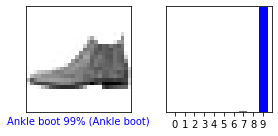

In [0]:
plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 1)
plot_image(x_test[0], predictions[0], y_test[0])
plt.subplot(1, 2, 2)
plot_value_array(x_test[0], predictions[0], y_test[0])
plt.tight_layout()
plt.show()

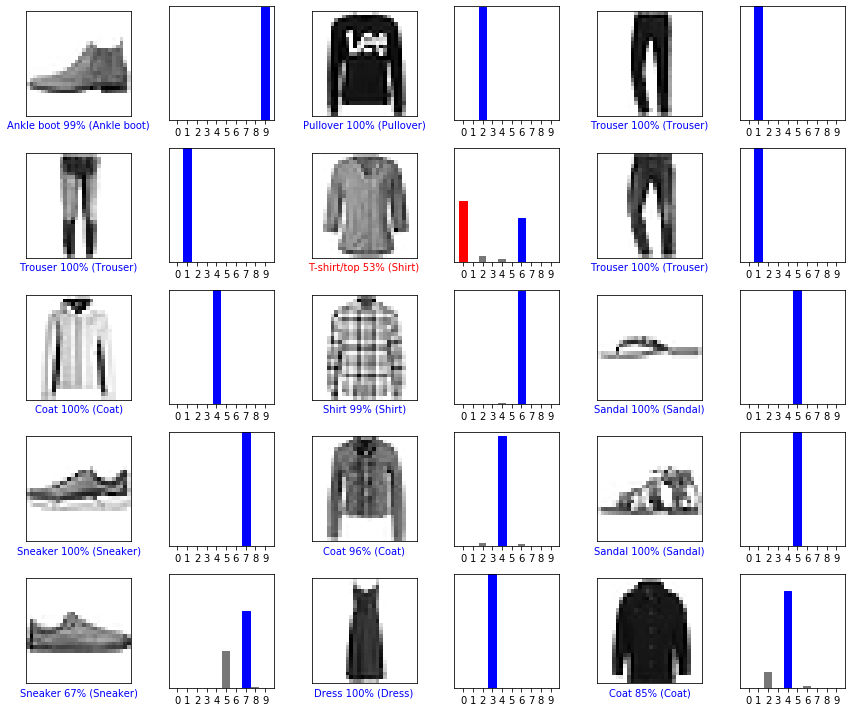

In [0]:
n_rows = 5
n_cols = 3
n_images = n_rows * n_cols
plt.figure(figsize=(2*2*n_cols, 2*n_rows))
for i in range(n_images):
    plt.subplot(n_rows, 2*n_cols, 2*i + 1)
    plot_image(x_test[i], predictions[i], y_test[i])
    plt.subplot(n_rows, 2*n_cols, 2*i + 2)
    plot_value_array(x_test[i], predictions[i], y_test[i])
plt.tight_layout()
plt.show()

**Phân loại một bức ảnh**

In [0]:
# ví dụ phân loại ảnh đầu tiên trong test set
img = x_test[0]

In [0]:
print(img.shape)

(28, 28)


In [0]:
#prob_model(img)

Lưu ý: đầu vào của hàm `model.predict` luôn phải là 1 batch. Trong trường hợp này đầu phải có shape là $(1, 28, 28)$



In [0]:
img = img[np.newaxis,...]
print(img.shape)

In [0]:
probs = prob_model(img).numpy()[0]
print(probs)

In [0]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_image(img[0], probs, y_test[0])
plt.subplot(1, 2, 2)
plot_value_array(img[0], probs, y_test[0])
plt.xticks(range(10), class_names, rotation=45)
plt.show()